## Importing the Libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading/Loading the dataset

In [29]:
df = pd.read_csv('Comcast_telecom_complaints_data.csv')
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [30]:
df.shape

(2224, 11)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [32]:
df.isnull().sum().any()

False

In [33]:
print(df.columns)

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')


In [34]:
df.index

RangeIndex(start=0, stop=2224, step=1)

In [35]:
df.nunique()

Ticket #                       2224
Customer Complaint             1841
Date                             91
Date_month_year                  91
Time                           2190
Received Via                      2
City                            928
State                            43
Zip code                       1543
Status                            4
Filing on Behalf of Someone       2
dtype: int64

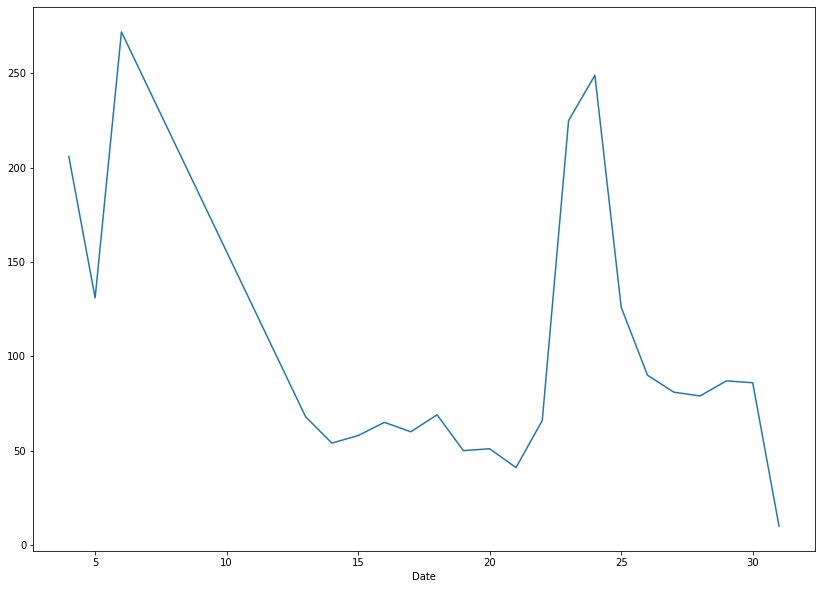

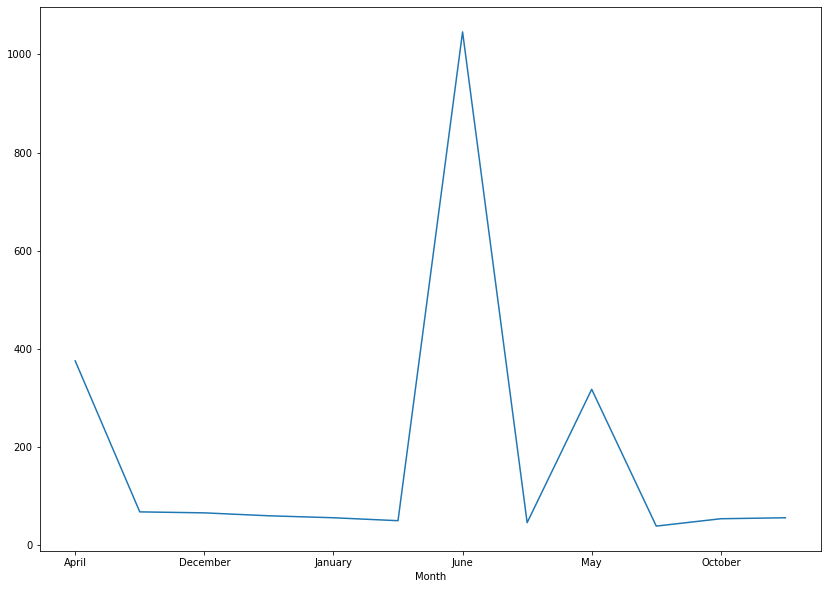

In [69]:
df['Month']=pd.to_datetime(df['Date_month_year']).dt.month_name()
df['Date']=pd.to_datetime(df['Date_month_year']).dt.day

fig=plt.figure(figsize=(14,10))
df.groupby(['Date'])['Customer Complaint'].count().plot()
plt.show()
fig=plt.figure(figsize=(14,10))
df.groupby(['Month'])['Customer Complaint'].count().plot()
plt.show() # -----> If not written then no poroblem only the following line in output will be visible <AxesSubplot:xlabel='Month'>

## Provide a table with the frequency of complaint types.

In [47]:
df['Customer Complaint'].value_counts().to_frame().reset_index() 

,index,Customer Complaint
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Comcast Billing,11
...,...,...
1836,Improper Billing and non resolution of issues,1
1837,Deceptive trade,1
1838,intermittent internet,1
1839,Internet Speed on Wireless Connection,1


In [48]:
# here .to_frame() is used to give a tabular form to value count
# and .reset_index() to give indices to the table

##  Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

In [59]:
df['Customer Complaint'].value_counts().head(10)

Comcast                     83
Comcast Internet            18
Comcast Data Cap            17
comcast                     13
Comcast Billing             11
Data Caps                   11
Comcast Data Caps           11
Unfair Billing Practices     9
Comcast data cap             8
Comcast internet             8
Name: Customer Complaint, dtype: int64

##  Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [60]:
df['Status']=df['Status'].apply(lambda x: 'Open' if ((x=='Open') | (x=='Pending')) else 'Closed')

In [71]:
open=df[df['Status']=='Open'].groupby(['State'])['Status'].count().to_frame().reset_index()
closed=df[df['Status']=='Closed'].groupby(['State'])['Status'].count().to_frame().reset_index()

##  Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3.

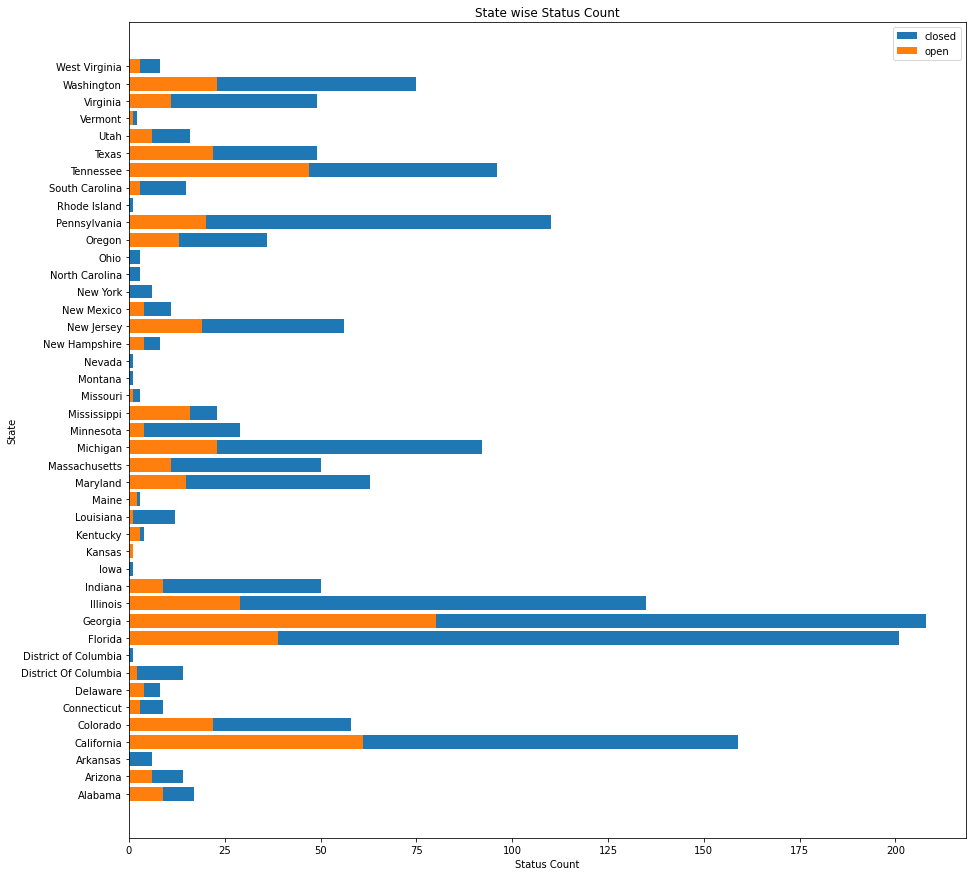

In [73]:
fig=plt.figure(figsize=(15,15))
plt.barh(closed.State, closed.Status)
plt.barh(open.State, open.Status)
plt.ylabel("State")
plt.xlabel("Status Count")
plt.legend(["closed", "open"])
plt.title("State wise Status Count")

plt.show()

## State with maximum complaints

In [74]:
df.groupby("State")['Customer Complaint'].agg("count").sort_values(ascending=False).head(1)

State
Georgia    288
Name: Customer Complaint, dtype: int64

## State with highest percentage of unresolved complaints

In [75]:
s_unsolved = df.loc[df['Status']=='Open',['State']].value_counts()
s_unsolved.head(1)/s_unsolved.sum()*100

State  
Georgia    15.473888
dtype: float64

## Percentage of complaints resolved till date, which were received through the Internet and customer care calls

In [76]:
df[df['Status']=='Closed'].groupby('Status')['Received Via'].value_counts(normalize=True)*100

Status  Received Via      
Closed  Customer Care Call    50.615114
        Internet              49.384886
Name: Received Via, dtype: float64